<a href="https://colab.research.google.com/github/shabahmd/Pytorch/blob/main/mini_batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
# The class for plotting the diagrams

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()


In [3]:
import torch
torch.manual_seed(1)

In [4]:
X = torch.arange(-3, 3, 0.1).view(-1,1)
f =  1 * X-1
Y = f +0.1 * torch.randn(X.size())

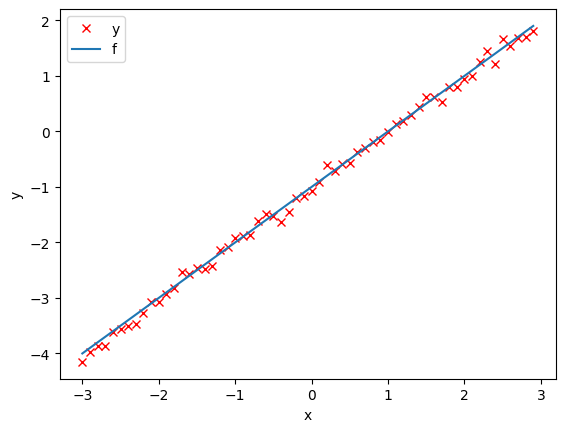

In [5]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [6]:
def forward(x):
  return w*x +b

In [7]:
def criterion(yhat, y):
  return torch.mean((yhat -y)**2)

<Figure size 640x480 with 0 Axes>

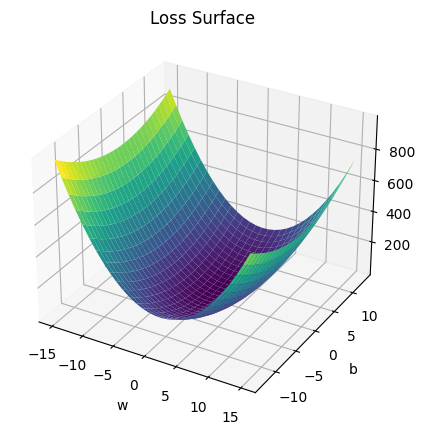

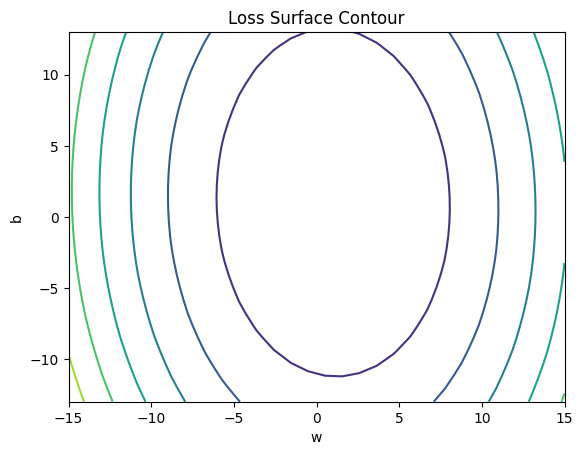

In [9]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30)


In [14]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.9, requires_grad= True)
lr = 0.1

LOSS_BGD = []
def train_model_BGD(epochs):
  for epoch in range(epochs):

    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    LOSS_BGD.append(loss)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    get_surface.plot_ps()
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data -lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

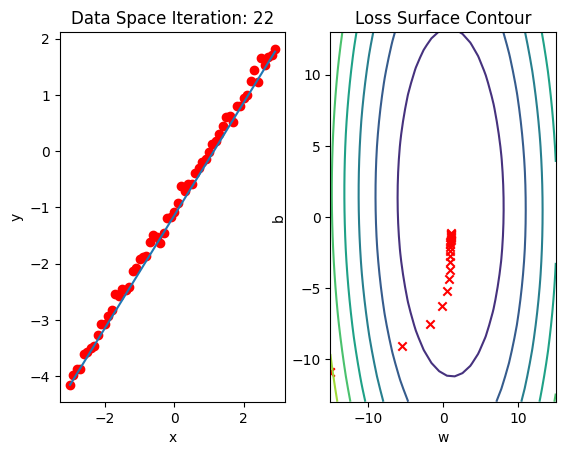

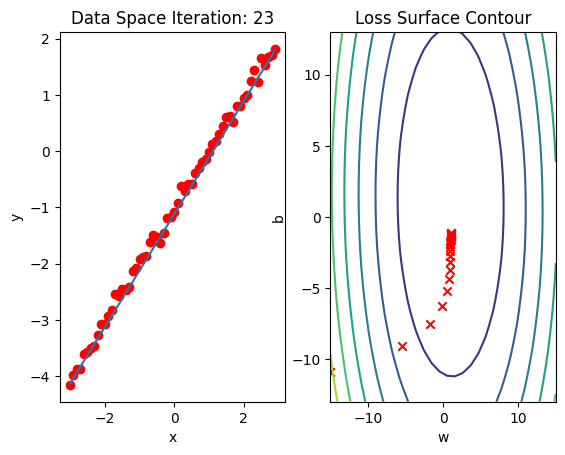

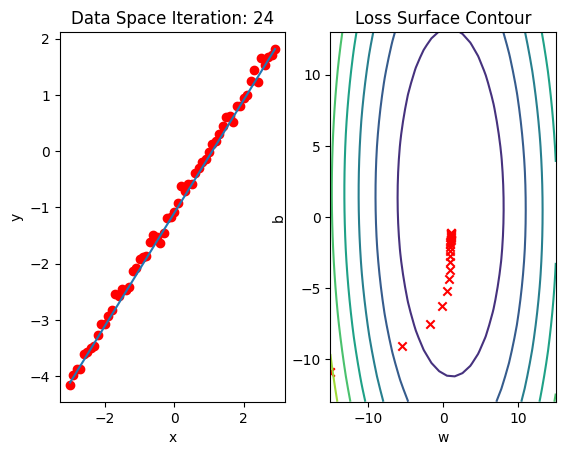

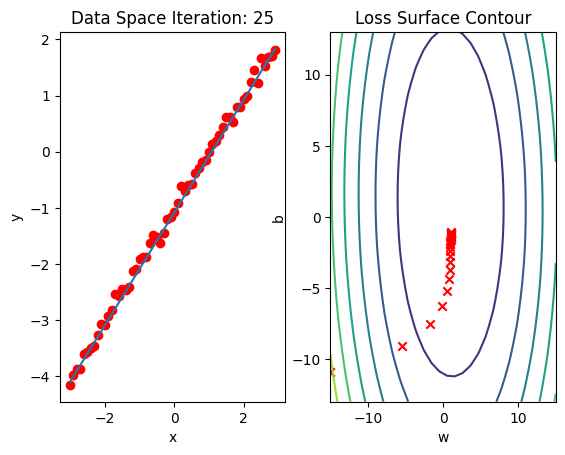

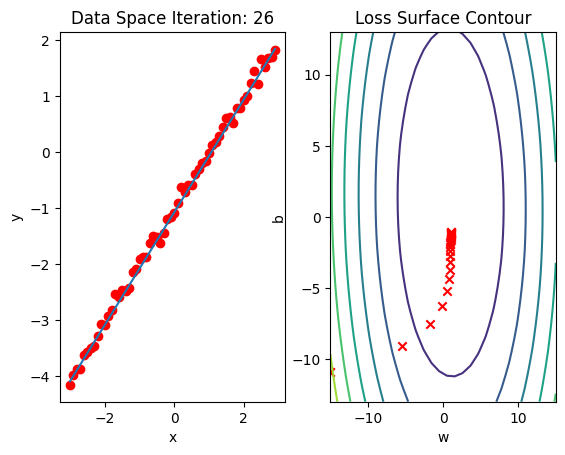

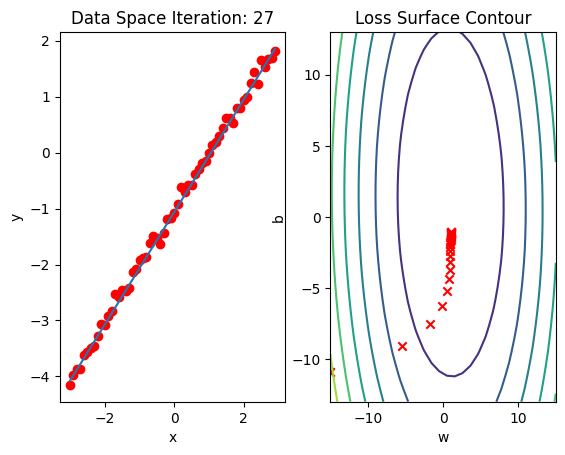

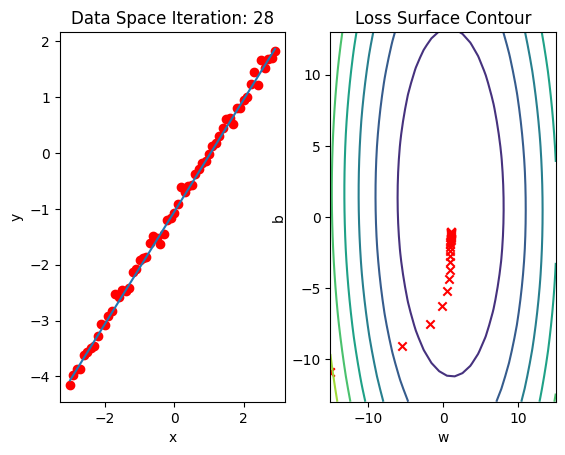

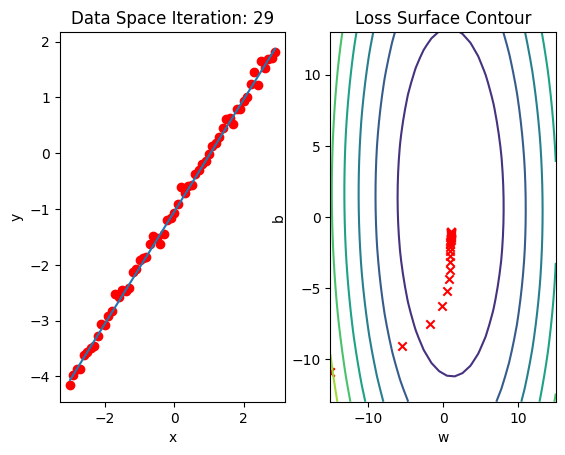

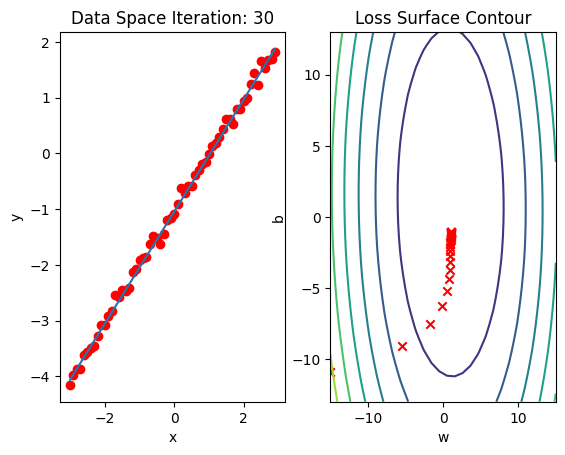

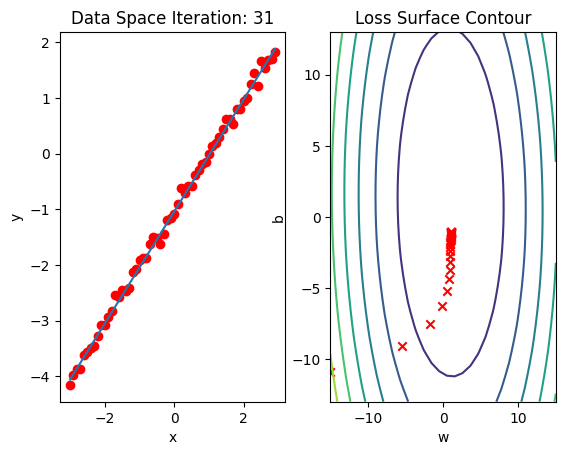

In [17]:
train_model_BGD(10)

In [19]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30,go = False)

In [20]:
from torch.utils.data import Dataset, DataLoader

In [21]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.y = 1*X-1
    self.len = self.x.shape[0]
  def __getitem__(self,index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [22]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size =1)

In [23]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_SGD = []

lr = 0.1

def train_model_SGD(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
    get_surface.plot_ps()
    LOSS_SGD.append(criterion(forward(X), Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.data.zero_()
      w.grad.data.zero_()
    get_surface.plot_ps()

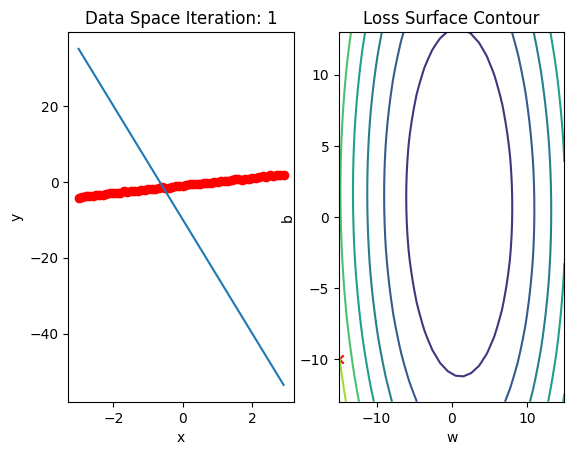

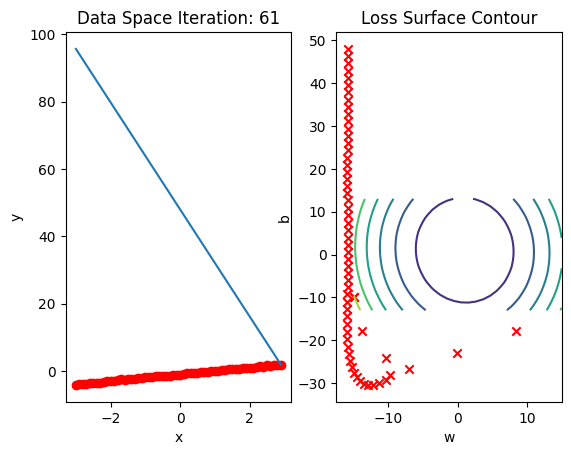

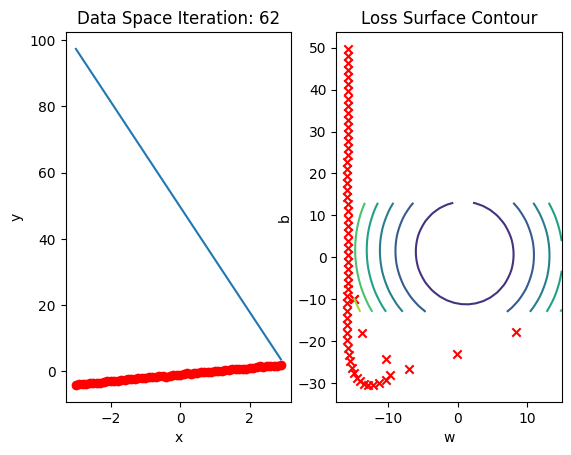

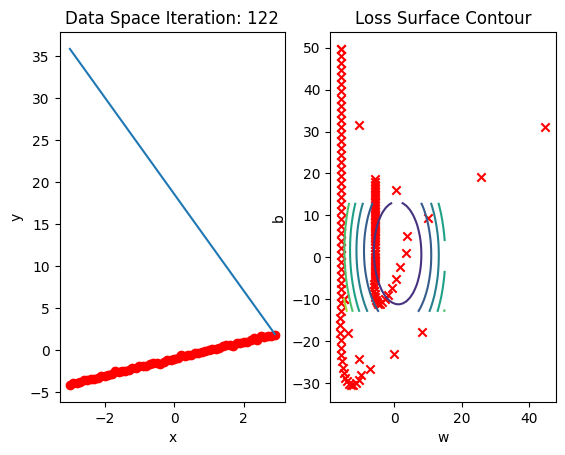

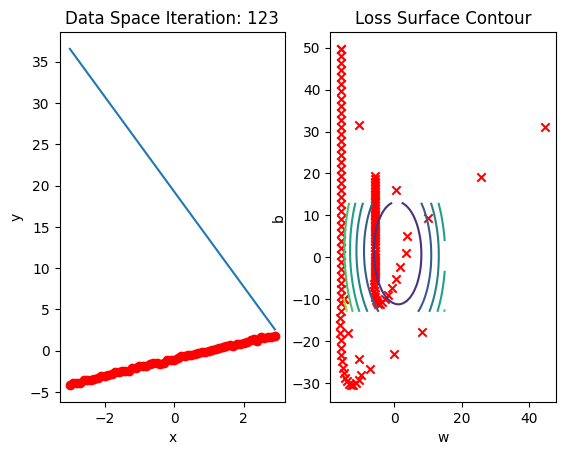

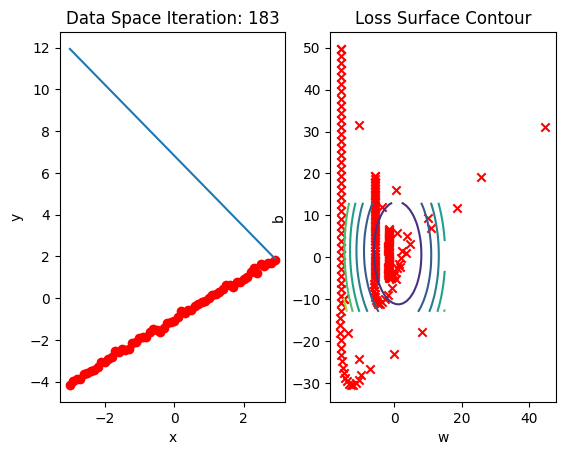

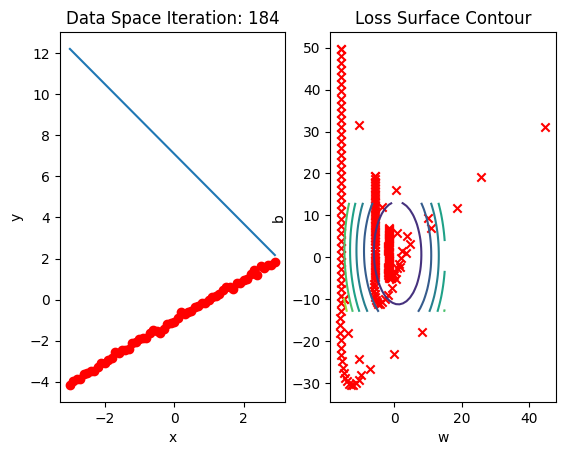

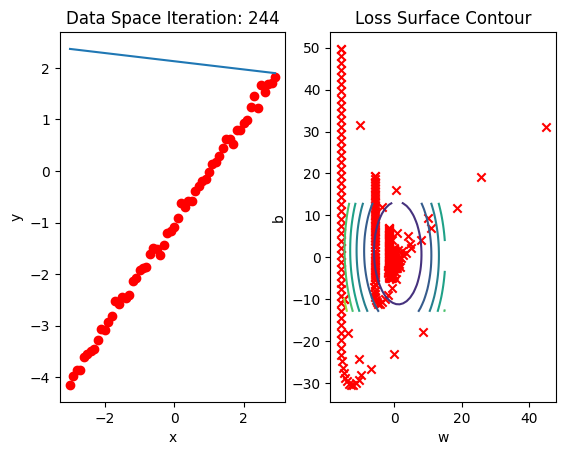

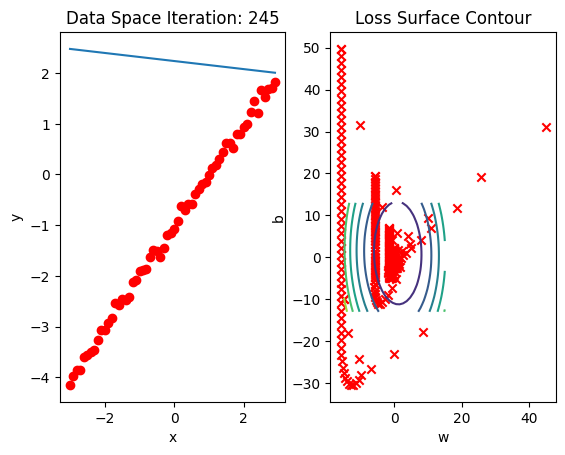

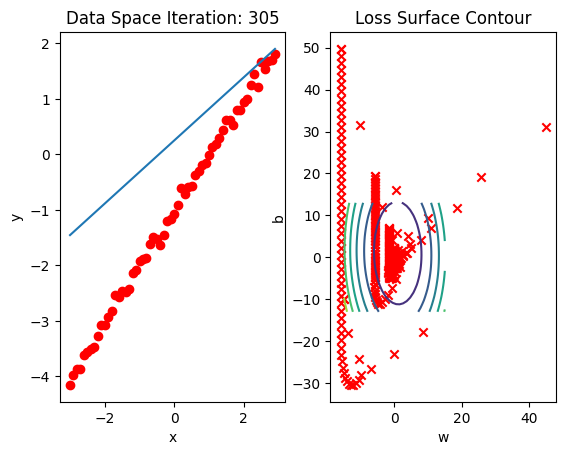

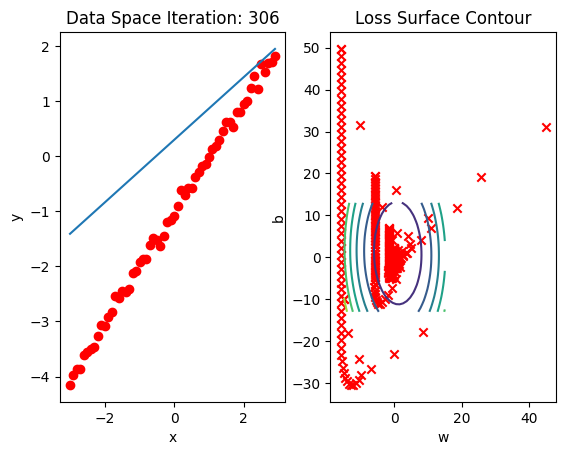

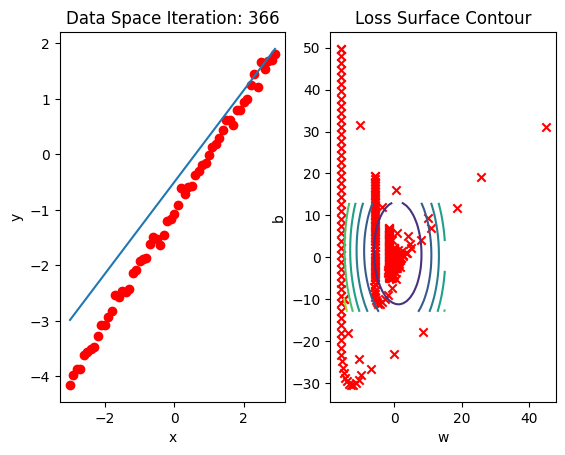

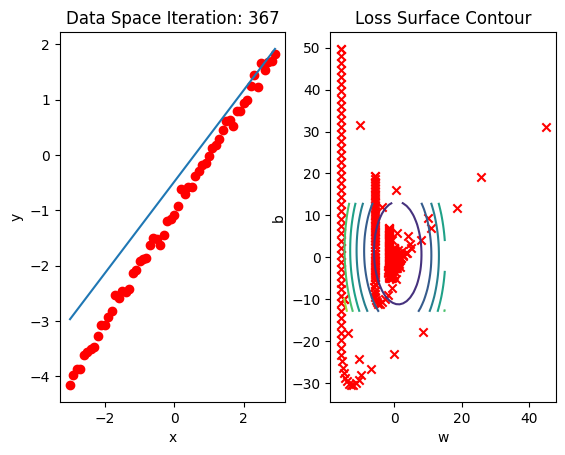

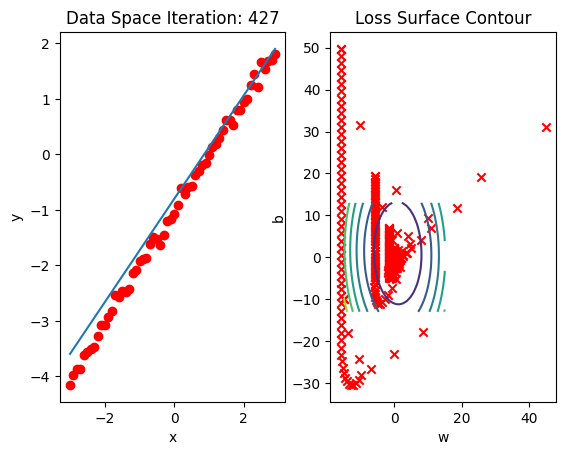

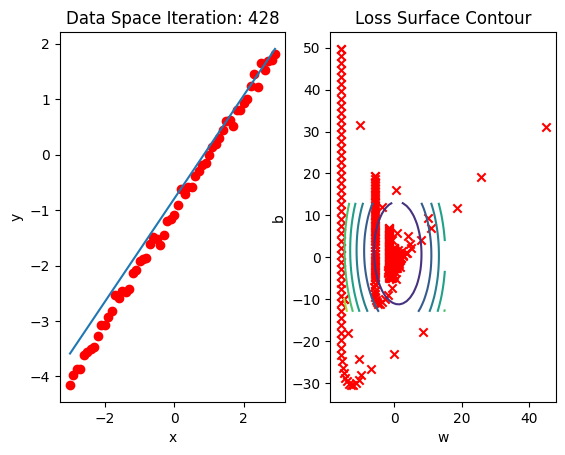

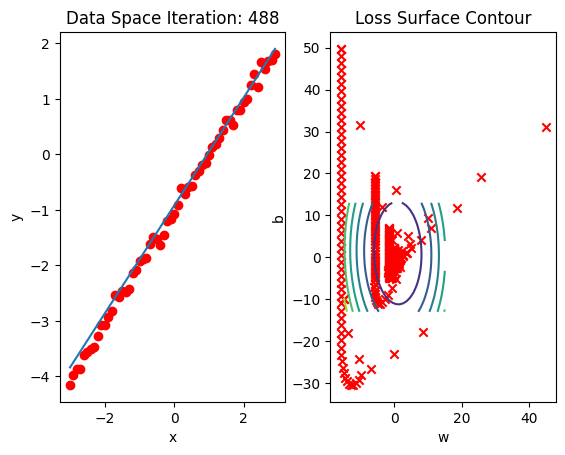

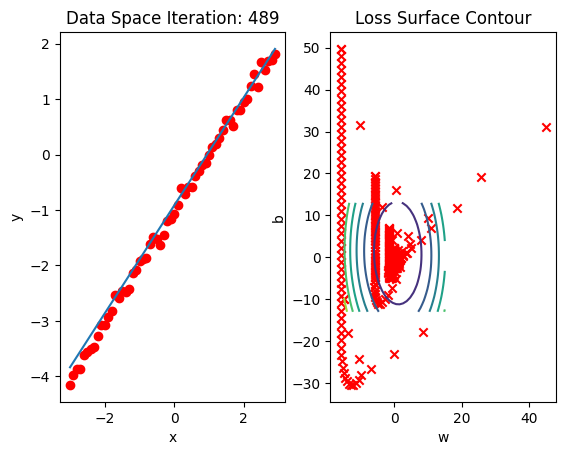

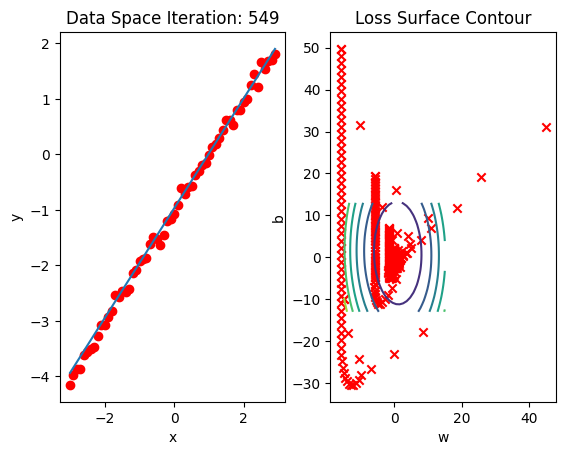

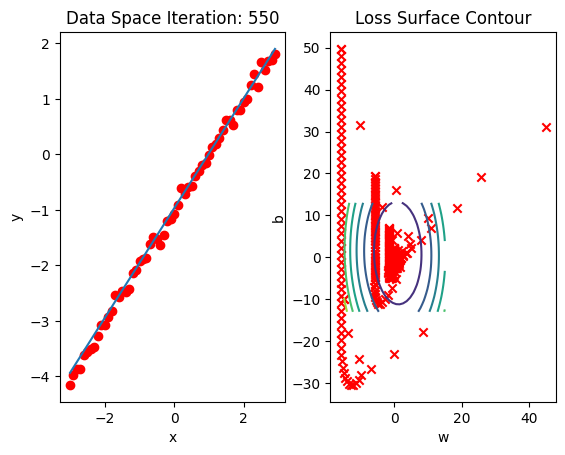

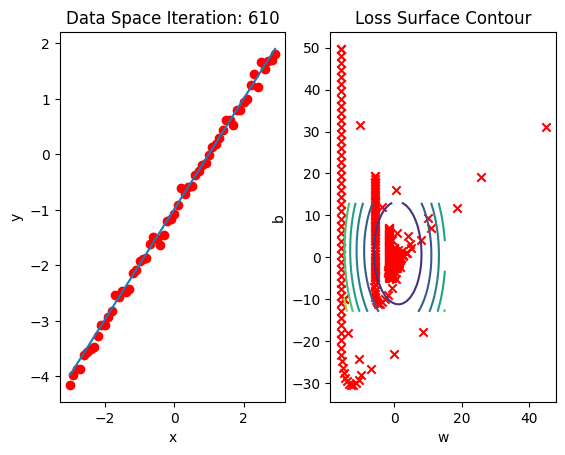

In [24]:
train_model_SGD(10)

In [25]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [26]:
dataset = Data()
trainloader = DataLoader(dataset =  dataset, batch_size =5)

In [27]:
w = torch.tensor(-15.0, requires_grad = True)
b =  torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

In [28]:
def train_model_Mini5(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()


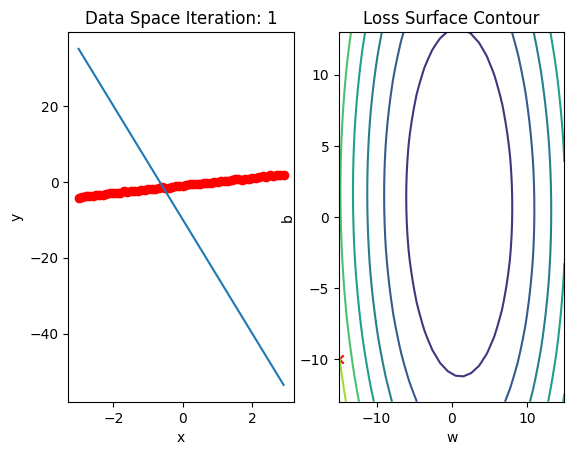

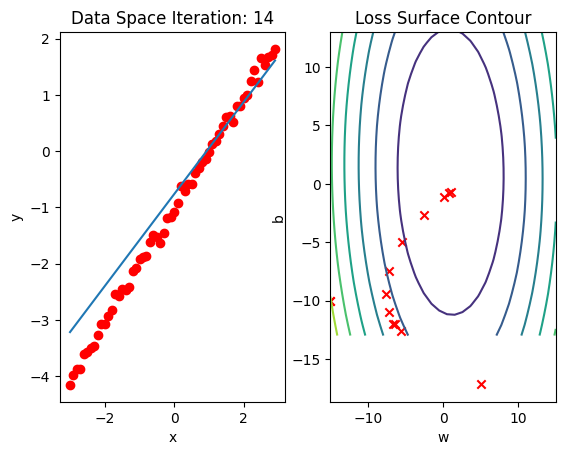

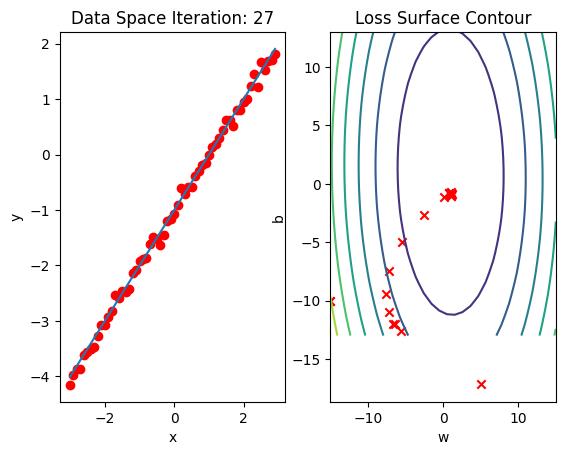

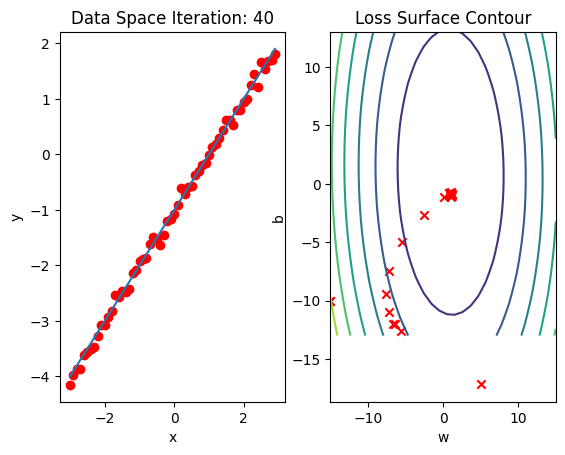

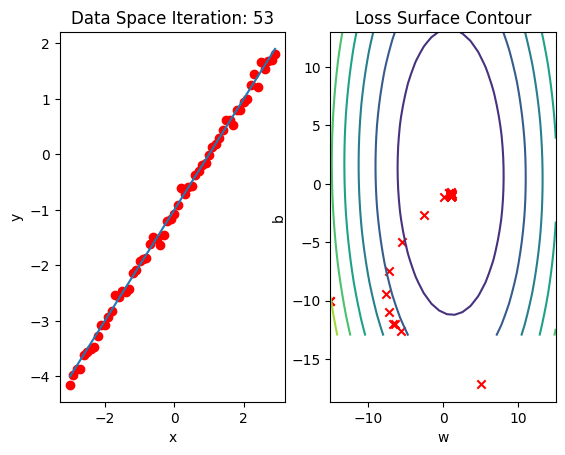

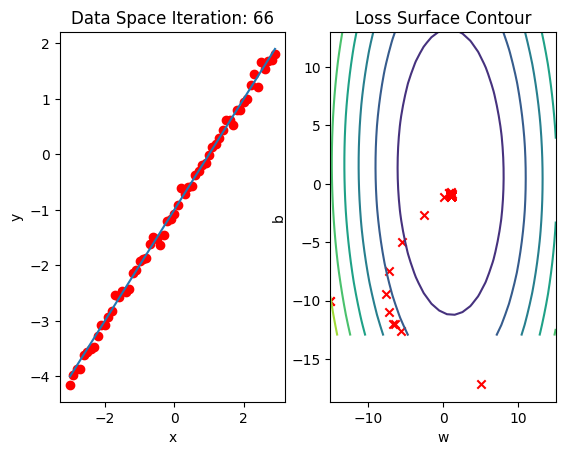

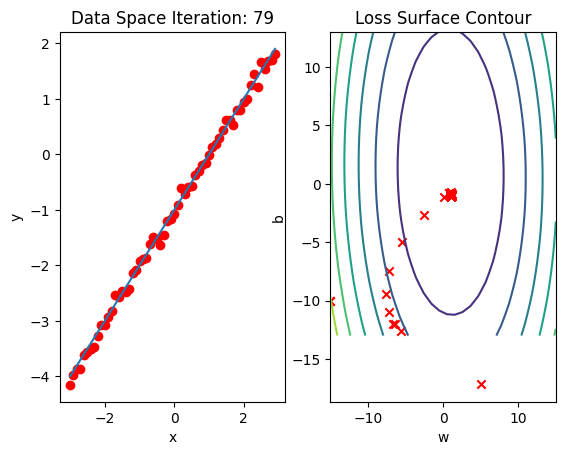

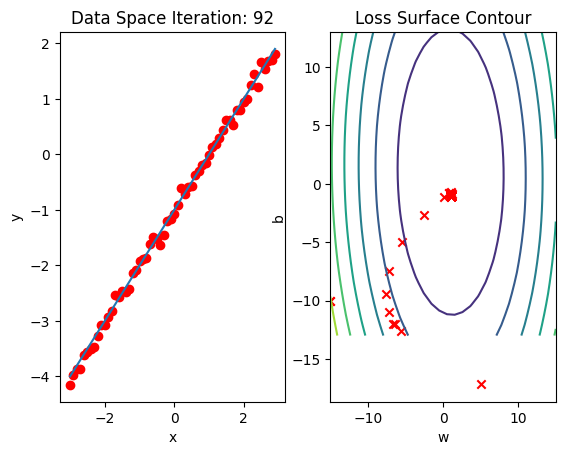

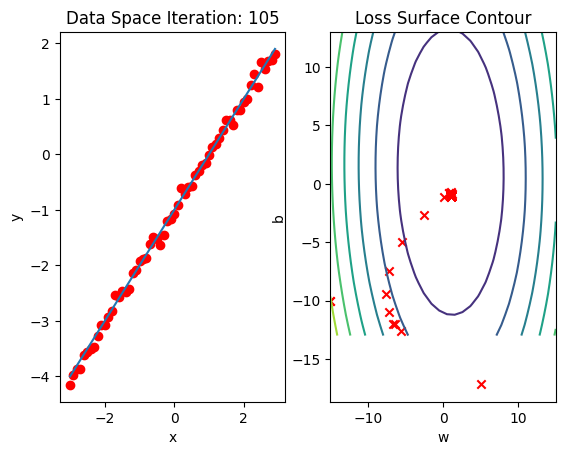

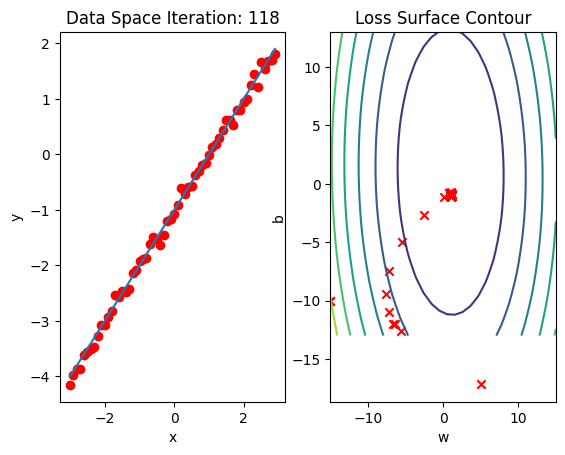

In [29]:
train_model_Mini5(10)

In [30]:
get_surface =  plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [32]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)


In [37]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_Mini10(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()


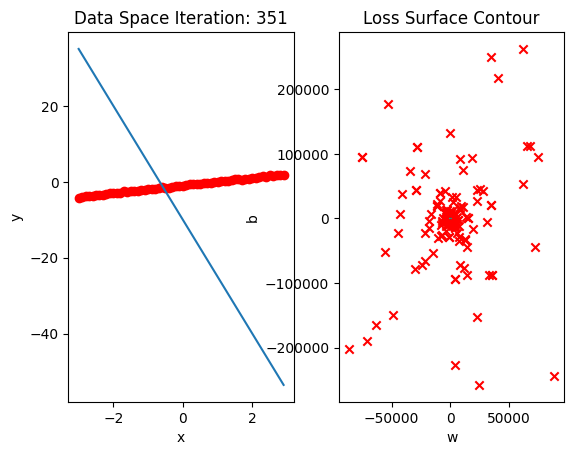

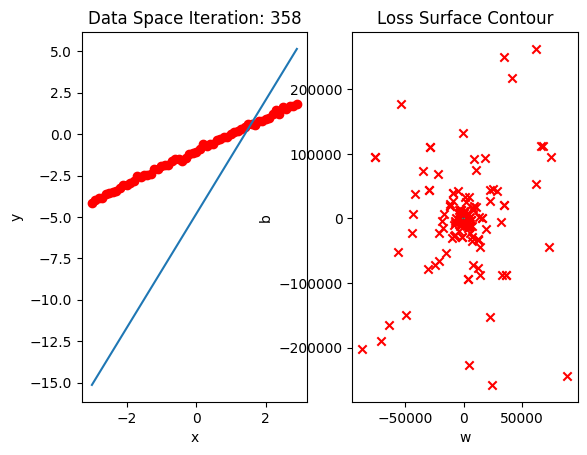

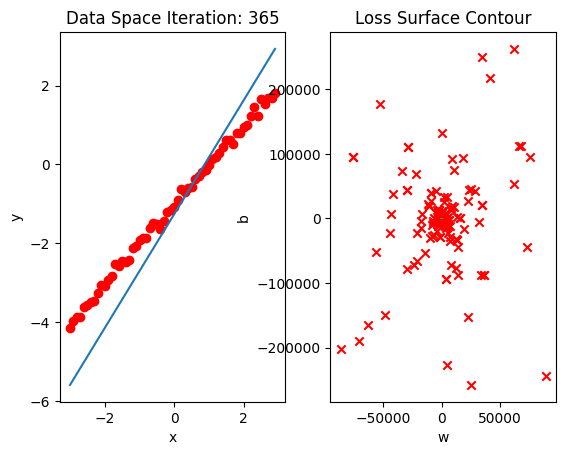

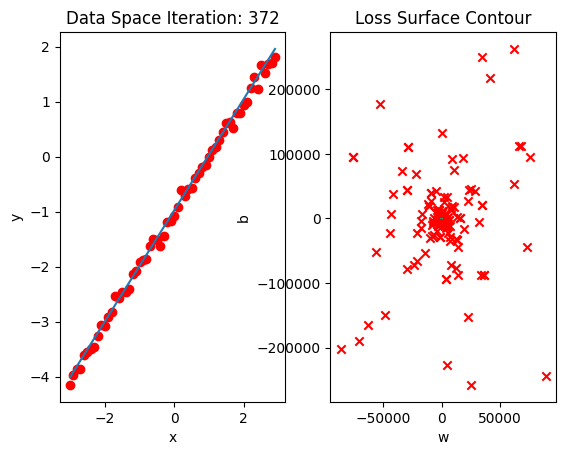

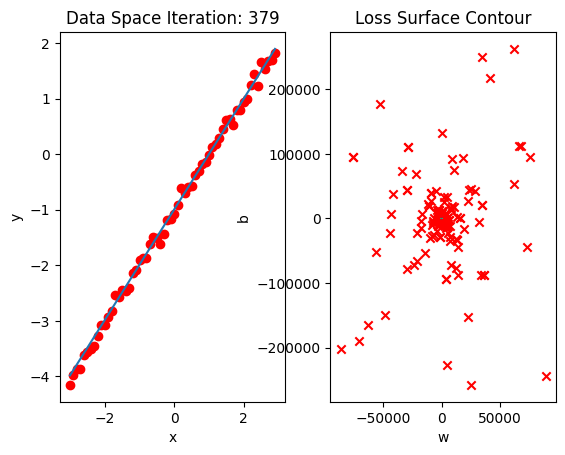

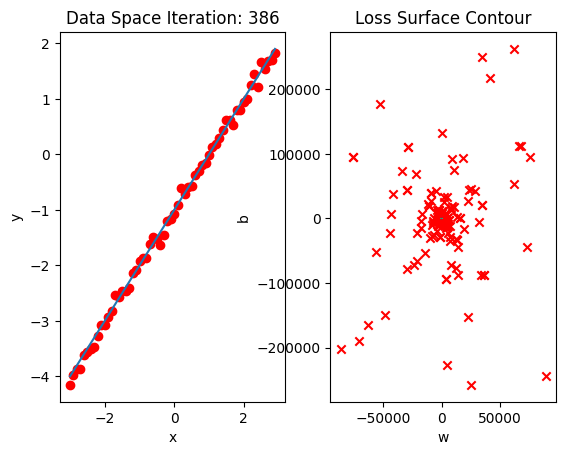

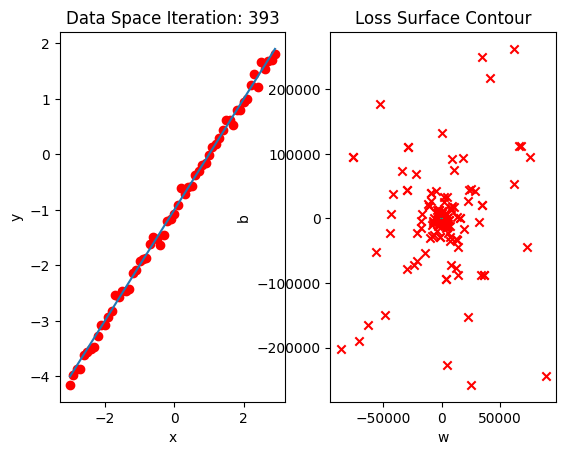

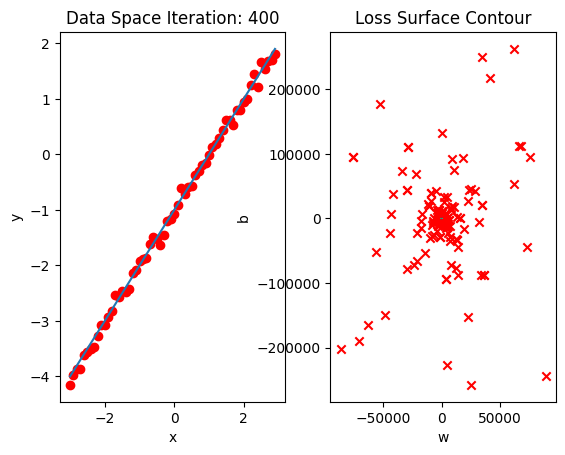

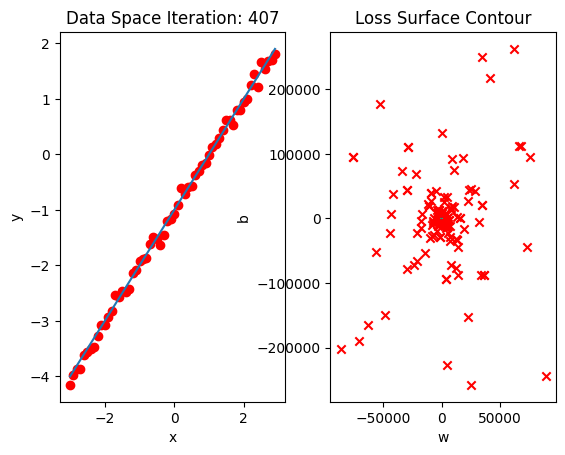

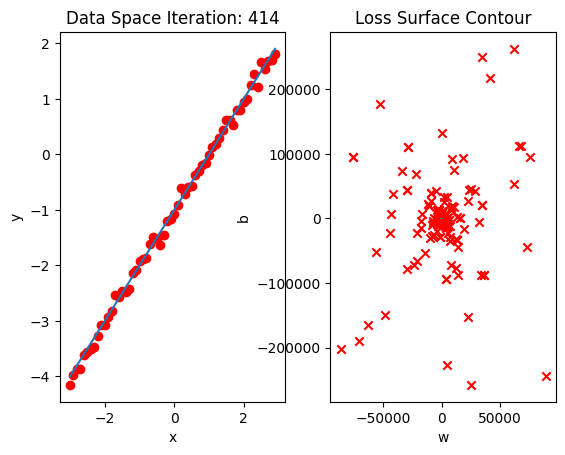

In [38]:
train_model_Mini10(10)

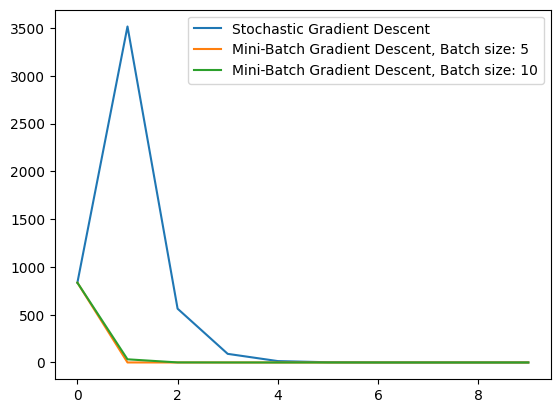

In [43]:
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()


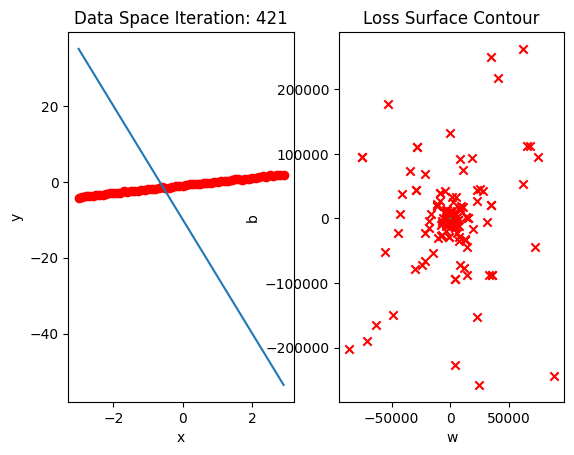

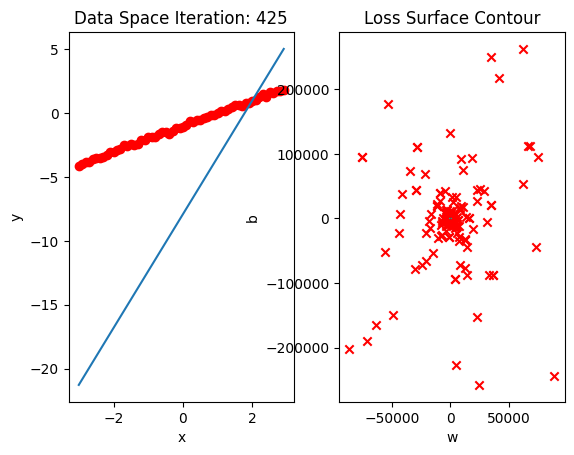

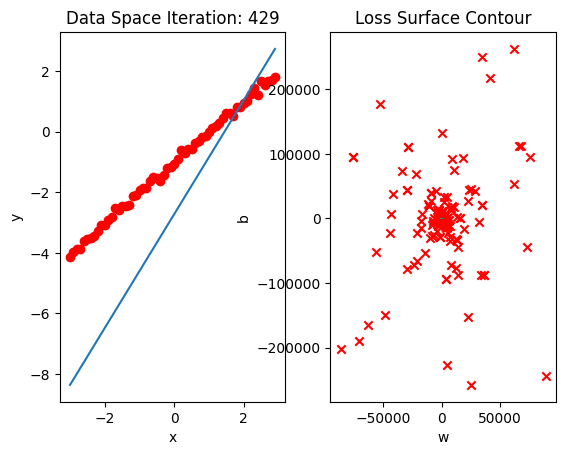

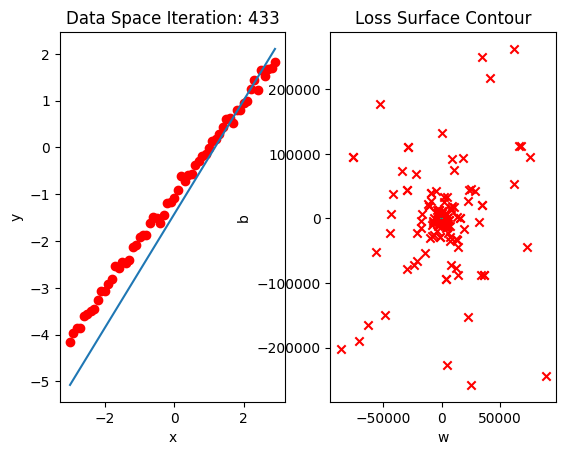

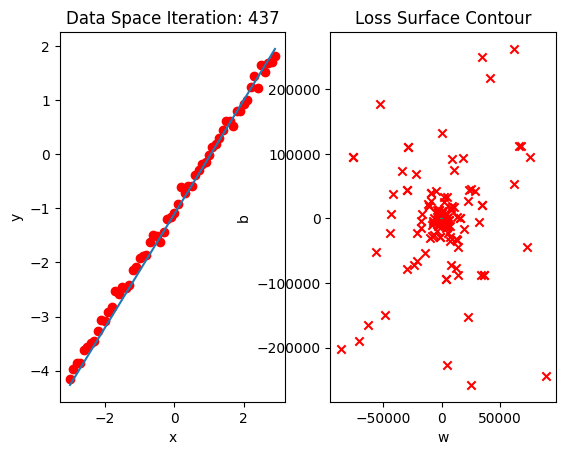

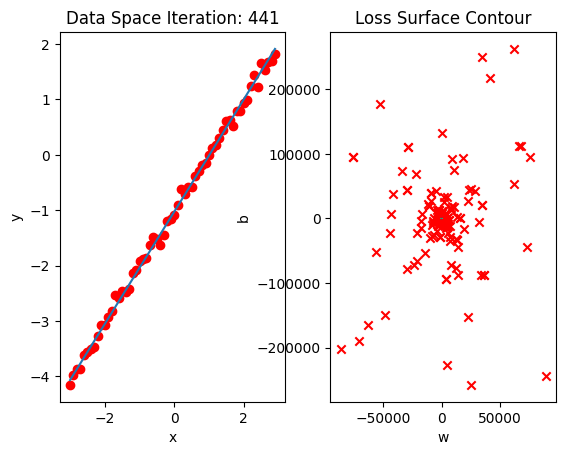

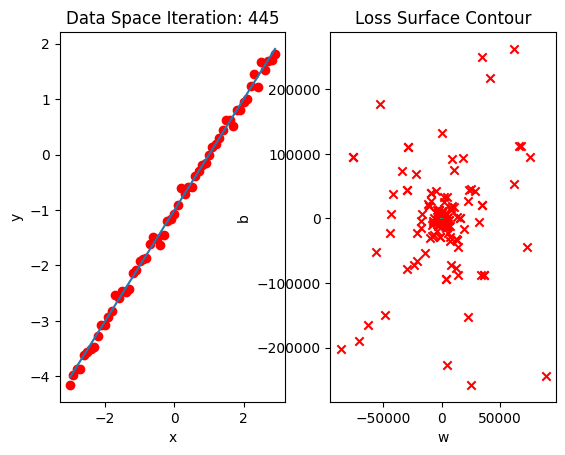

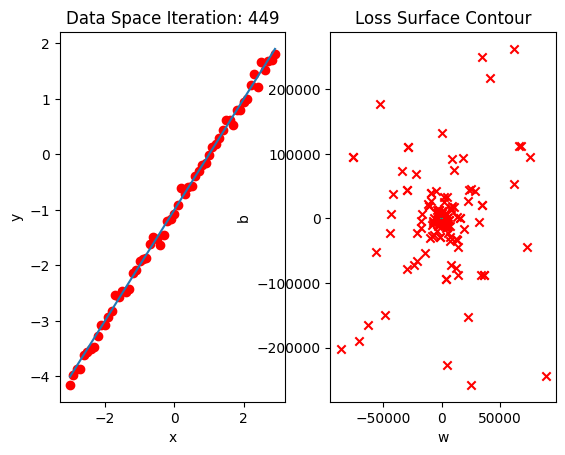

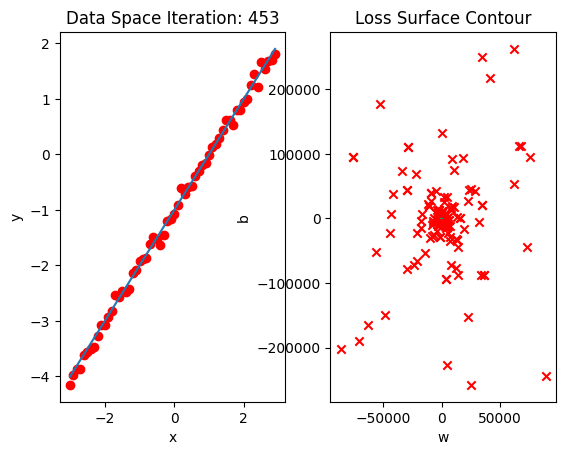

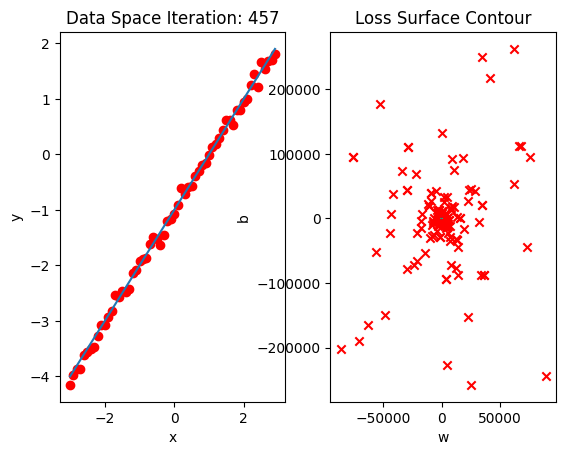

In [40]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 20)
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

LOSS_MINI20 = []
lr = 0.1

def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

my_train_model(10)


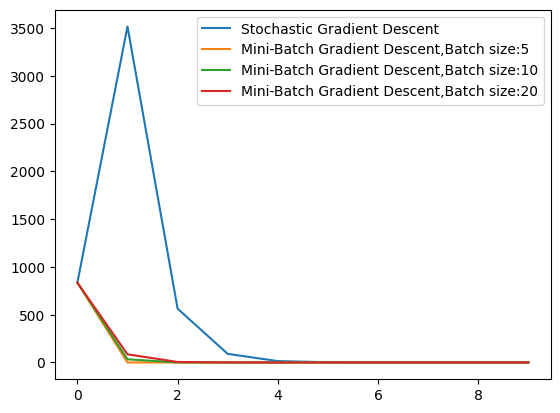

In [42]:
plt.plot(LOSS_SGD, label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5, label = "Mini-Batch Gradient Descent,Batch size:5")
plt.plot(LOSS_MINI10, label = "Mini-Batch Gradient Descent,Batch size:10")
plt.plot(LOSS_MINI20, label = "Mini-Batch Gradient Descent,Batch size:20")
plt.legend()
